### Decision Tree for Iris data

##### Load iris data from CSV file

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

df = pd.read_csv('../../data/iris.csv')
print(df.head())
print(df.describe())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


##### Split into training and test data

In [2]:
X = df.drop('species', axis='columns')
y = df.species

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

##### Fit to a DecisionTreeClassifier with max_depth=2

In [3]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)
model.get_depth()

2

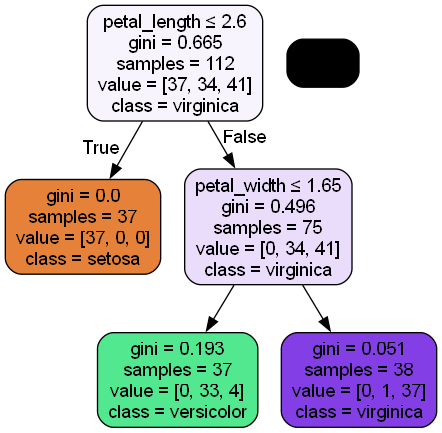

In [4]:
feature_names = ["sepal_length","sepal_width","petal_length","petal_width"]
target_names = ["setosa", "versicolor", "virginica"]
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names, class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('plots/iris.png')
Image(graph.create_png())

In [14]:
%%sql
plot_tree(model, filled=True, feature_names = feature_names, class_names = target_names)
plt.show()

Exception: Variable Name is not chosen

##### Find the accuracy and confusion matrix

In [7]:
print("Train data R2: ",model.score(X_train, y_train))
print("Test data R2: ",model.score(X_test, y_test))

Train data R2:  0.9553571428571429
Test data R2:  0.9736842105263158
